# アヤメ分類

参考：https://qiita.com/yshi12/items/26771139672d40a0be32
      https://qiita.com/Hirochon/items/12379d7ca6141f1fb6fa#1-%E5%AF%BE%E8%B1%A1%E8%AA%AD%E8%80%85%E3%81%A8%E3%81%8B%E6%9B%B8%E3%81%84%E3%81%A6%E3%81%BF%E3%82%8B
      SVM: https://qiita.com/arata-honda/items/bc24cbd953bd9d2c743c
      

使用するデータ scikit-learnに用意されているデータセットを使用
https://archive.ics.uci.edu/ml/datasets/Iris

In [10]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

目的：アヤメ族の種類を分類すること

In [7]:
iris = load_iris()

 中身の確認

In [8]:
print("与えられたデータ")
print(iris.data)
print(iris.data.shape)
print("-----------------")
print("予測するデータ")
print(iris.target)
print(iris.target.shape)
print(iris.target_names)

与えられたデータ
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6

pandasを用いてデータをわかりやすくする

In [12]:
iris_data = pd.DataFrame(iris.data, columns=["がく片の長さ","がく片の幅","花びらの長さ","花びらの幅"])
iris_target = pd.DataFrame(iris.target, columns=["花の種類"])
iris_all = pd.concat([iris_data,iris_target], axis=1)

In [13]:
iris_all.head()

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅,花の種類
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
iris_all.describe()

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅,花の種類
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


テスト用データと学習用データを分類 　　　　今回は全体の３分の１をテスト用に使用=0.33

In [15]:
setsumei_train,setsumei_test,mokuteki_train,mokuteki_test = train_test_split(iris_data, iris_target, test_size=0.33)

In [16]:
setsumei_train.head(5)

,がく片の長さ,がく片の幅,花びらの長さ,花びらの幅
27,5.2,3.5,1.5,0.2
147,6.5,3.0,5.2,2.0
86,6.7,3.1,4.7,1.5
30,4.8,3.1,1.6,0.2
111,6.4,2.7,5.3,1.9


In [20]:
mokuteki_train.head(5)

,花の種類
27,0
147,2
86,1
30,0
111,2


散布図をplt.scatterで描いていく　

↓下図ががく片の長さと幅を使ってプロットした結果

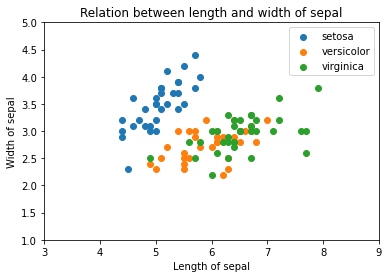

In [19]:
plt.scatter(setsumei_train[mokuteki_train["花の種類"]==0]["がく片の長さ"],setsumei_train[(mokuteki_train == 0).values]["がく片の幅"],label="setosa",cmap="rgb")
plt.scatter(setsumei_train[mokuteki_train["花の種類"]==1]["がく片の長さ"],setsumei_train[(mokuteki_train == 1).values]["がく片の幅"],label="versicolor",cmap="rgb")
plt.scatter(setsumei_train[mokuteki_train["花の種類"]==2]["がく片の長さ"],setsumei_train[(mokuteki_train == 2).values]["がく片の幅"],label="virginica",cmap="rgb")

## X軸の範囲を指定
plt.xlim(3,9)
## Y軸の範囲を指定
plt.ylim(1,5)

## X軸の名前
plt.xlabel("Length of sepal")
## Y軸の名前
plt.ylabel("Width of sepal")

## グラフのタイトル
plt.title("Relation between length and width of sepal")
## 凡例を出力
plt.legend()

↓下図が花びらの長さと幅を使ってプロットした結果

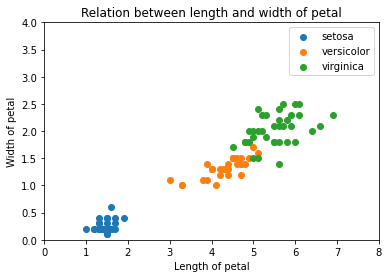

In [22]:
plt.scatter(setsumei_train[mokuteki_train["花の種類"]==0]["花びらの長さ"],setsumei_train[(mokuteki_train == 0).values]["花びらの幅"],label="setosa",cmap="rgb")
plt.scatter(setsumei_train[mokuteki_train["花の種類"]==1]["花びらの長さ"],setsumei_train[(mokuteki_train == 1).values]["花びらの幅"],label="versicolor",cmap="rgb")
plt.scatter(setsumei_train[mokuteki_train["花の種類"]==2]["花びらの長さ"],setsumei_train[(mokuteki_train == 2).values]["花びらの幅"],label="virginica",cmap="rgb")

plt.xlim(0,8)
plt.ylim(0,4)

plt.xlabel("Length of petal")
plt.ylabel("Width of petal")

plt.title("Relation between length and width of petal")
plt.legend()

今回は特徴量として花びらの長さと幅を用い他方が良いと予想する 

# ２つの特徴量を作成

In [25]:
## がく片コンビのDataFrameを作成する。
gakuhen_train = setsumei_train.loc[:,["がく片の長さ","がく片の幅"]]

## 花びらコンビのDataFrameを作成する。
hanabira_train = setsumei_train.loc[:,["花びらの長さ","花びらの幅"]]

LinearSVCでモデル構築⇒学習⇒予測する.ipynb

In [28]:
## それぞれモデルを構築
## それぞれモデルを構築
gakuhen_model = LinearSVC()
hanabira_model = LinearSVC()

## それぞれのモデルに学習させる
gakuhen_model.fit(gakuhen_train,mokuteki_train)
hanabira_model.fit(hanabira_train,mokuteki_train)

## それぞれのモデルで予測させて、予測値を代入させる
### モデルが《がく片の長さと幅》を使って学習しているので、予測する時も《がく片の長さと幅》を渡す必要がある。
## DataFrame型
gakuhen_predict = gakuhen_model.predict(setsumei_test.loc[:,["がく片の長さ","がく片の幅"]])
### モデルが《花びらの長さと幅》を使って学習しているので、予測する時も《花びらの長さと幅》を渡す必要がある。
hanabira_predict = hanabira_model.predict(setsumei_test.loc[:,["花びらの長さ","花びらの幅"]])

答え合わせ


In [29]:
## sklearnライブラリからscore算出の関数をimport
from sklearn.metrics import accuracy_score

## gakuhen_scoreとhanabira_scoreにそれぞれに結果を代入
gakuhen_score = accuracy_score(mokuteki_test, gakuhen_predict)
hanabira_score = accuracy_score(mokuteki_test, hanabira_predict)

print('がく片の長さと幅コンビの正解率：{}'.format(gakuhen_score),'花びらの長さと幅コンビの正解率：{}'.format(hanabira_score), sep='\n')

がく片の長さと幅コンビの正解率：0.82
花びらの長さと幅コンビの正解率：0.92


# 分類の境界を可視化する.ipynb

In [30]:
def heacet_border_check(H, M, model, param1, param2, resolution=0.01):
    H1_min, H1_max = H[param1].min()-0.5, H[param1].max()+0.5
    H2_min, H2_max = H[param2].min()-0.5, H[param2].max()+0.5
    H1, H2 = np.meshgrid(np.arange(H1_min, H1_max, resolution),
                           np.arange(H2_min, H2_max, resolution))
    n = np.array([H1.ravel(), H2.ravel()]).T
    Z = model.predict(n)
    Z = Z.reshape(H1.shape)
    plt.contourf(H1, H2, Z, alpha=0.5, cmap="Set2")
    plt.xlim(H1_min, H1_max)
    plt.ylim(H2_min, H2_max)
    plt.xlabel("Length")
    plt.ylabel("Width")
    plt.scatter(H[param1],H[param2], c=M["花の種類"], cmap="brg")

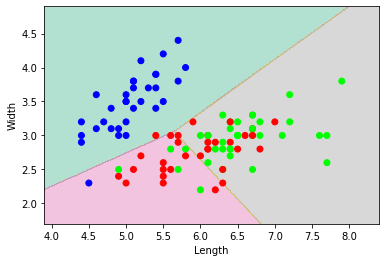

In [31]:
heacet_border_check(setsumei_train, mokuteki_train, gakuhen_model, "がく片の長さ", "がく片の幅")

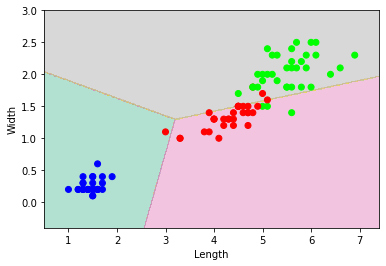

In [32]:
heacet_border_check(setsumei_train, mokuteki_train, hanabira_model, "花びらの長さ", "花びらの幅")